# Plot

> A collection of plot functions

In [ ]:
#| default_exp plot

In [ ]:
#| hide
from nbdev.showdoc import *
%matplotlib inline

In [ ]:
#| export
from sklearn.decomposition import PCA
from fastbook import *
import seaborn as sns

In [ ]:
#| export
from tools.func import *
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [ ]:
#| export
def get_pca(df,# the first column is name/id
           seed=123
           ):
    pca = PCA(n_components=2, random_state = seed)
    proj = pca.fit_transform(df.iloc[:,1:])
    pca_df = pd.DataFrame(proj, columns=["PCA1", "PCA2"])
    pca_df = pd.concat([df[df.columns[0]],pca_df],axis=1)
    return pca_df

In [ ]:
#| export
def plot_2d(pca_df,
           hue,
           palette = 'tab10',
           legend=False):

    sns.relplot(data=pca_df, x='PCA1', y ='PCA2',hue =hue,palette=palette,s=50,alpha=0.8,legend=legend)
    plt.xticks([])
    plt.yticks([])

In [ ]:
#| export
def direct_pca_plot(df,
                    hue,
                    palette = 'tab10',
                    legend = False):
    pca_df = get_pca(df)
    plot_2d(pca_df,hue,palette,legend)

In [ ]:
df = pd.read_csv('kras_smiles.csv')

In [ ]:
df.shape

(62, 8)

In [ ]:
prop = smi2prop(df,std=False)
prop_std = smi2prop(df,std=True)

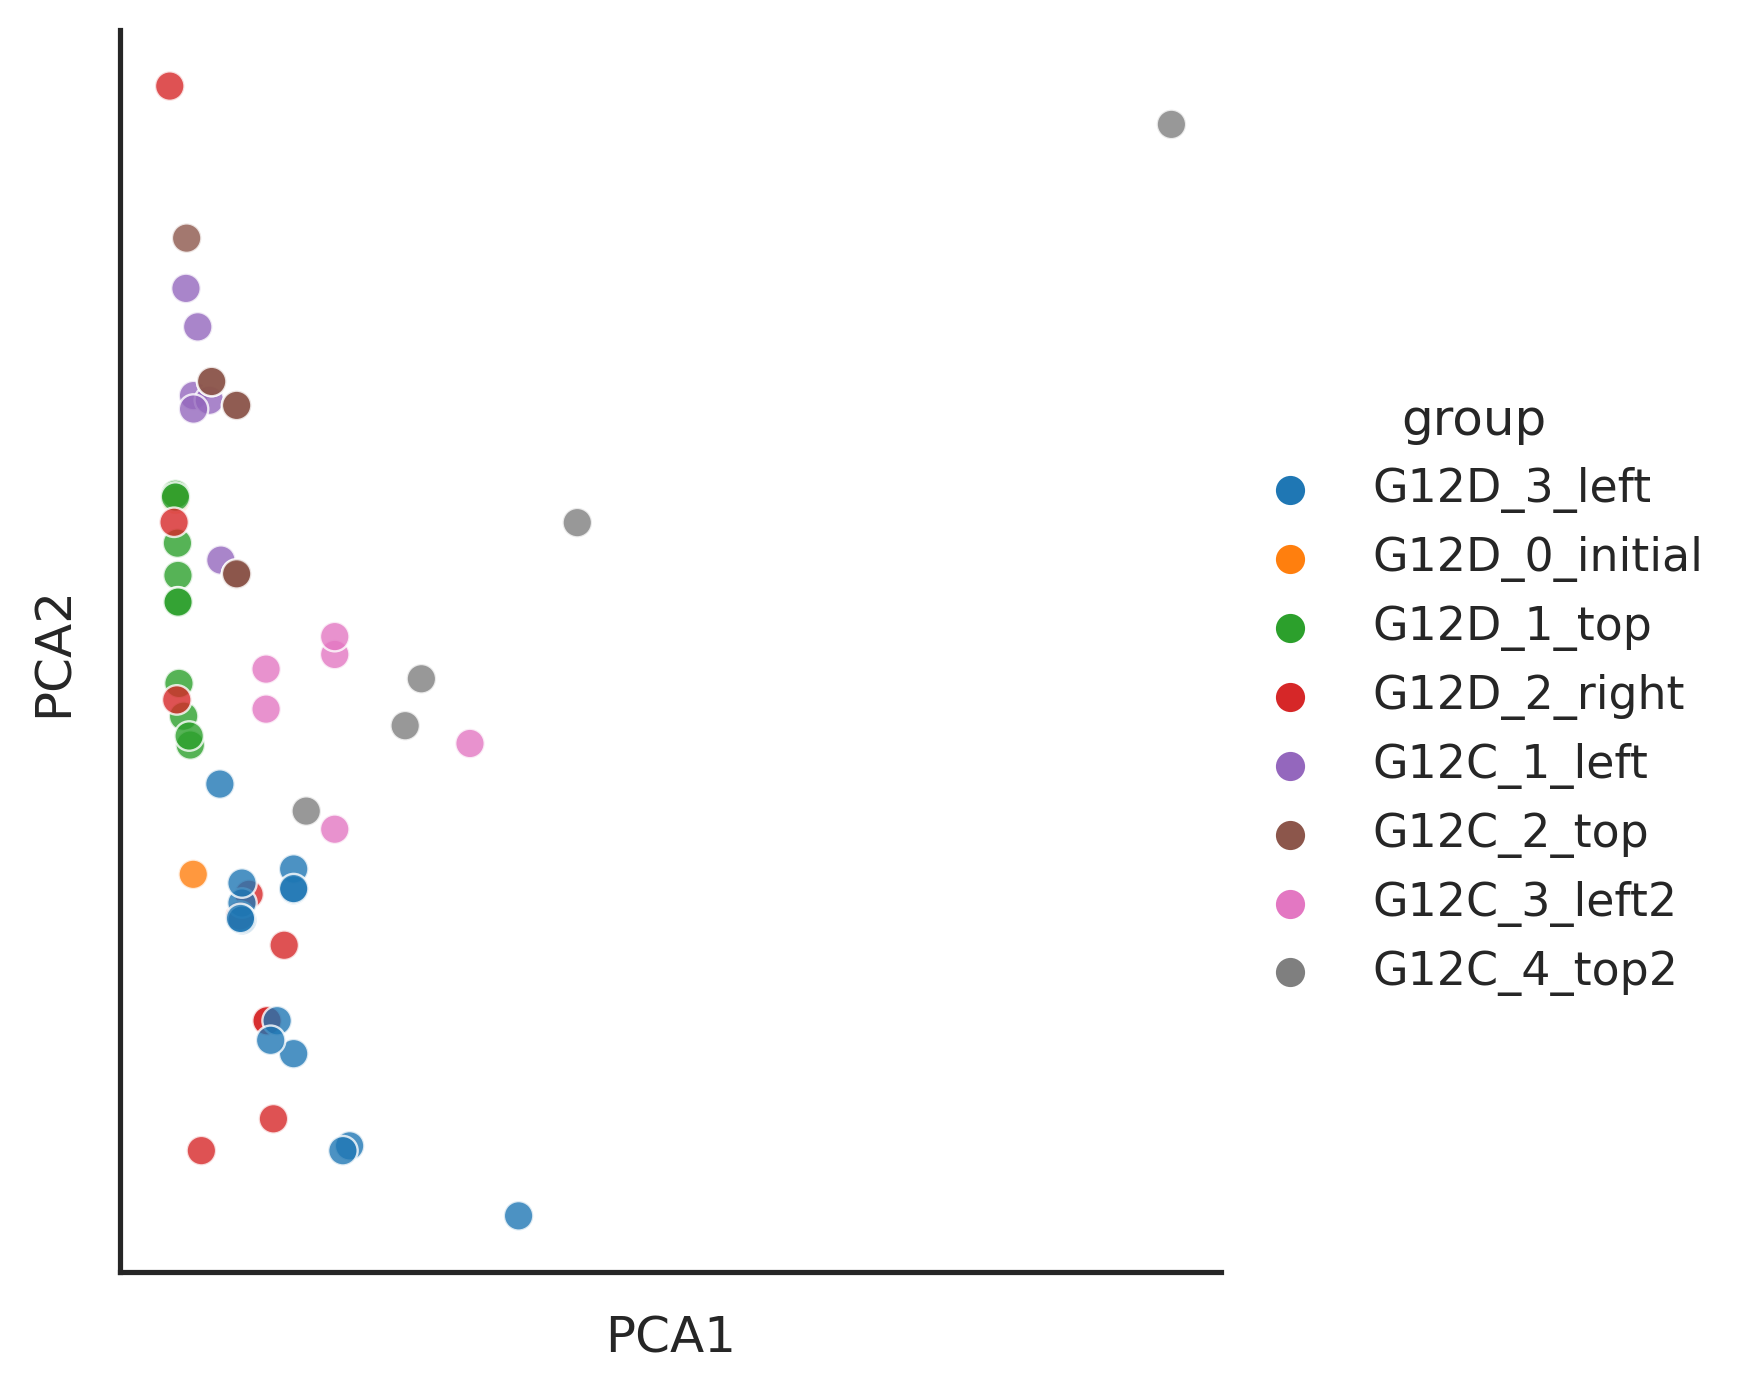

In [ ]:
direct_pca_plot(prop,df.group,legend=True)

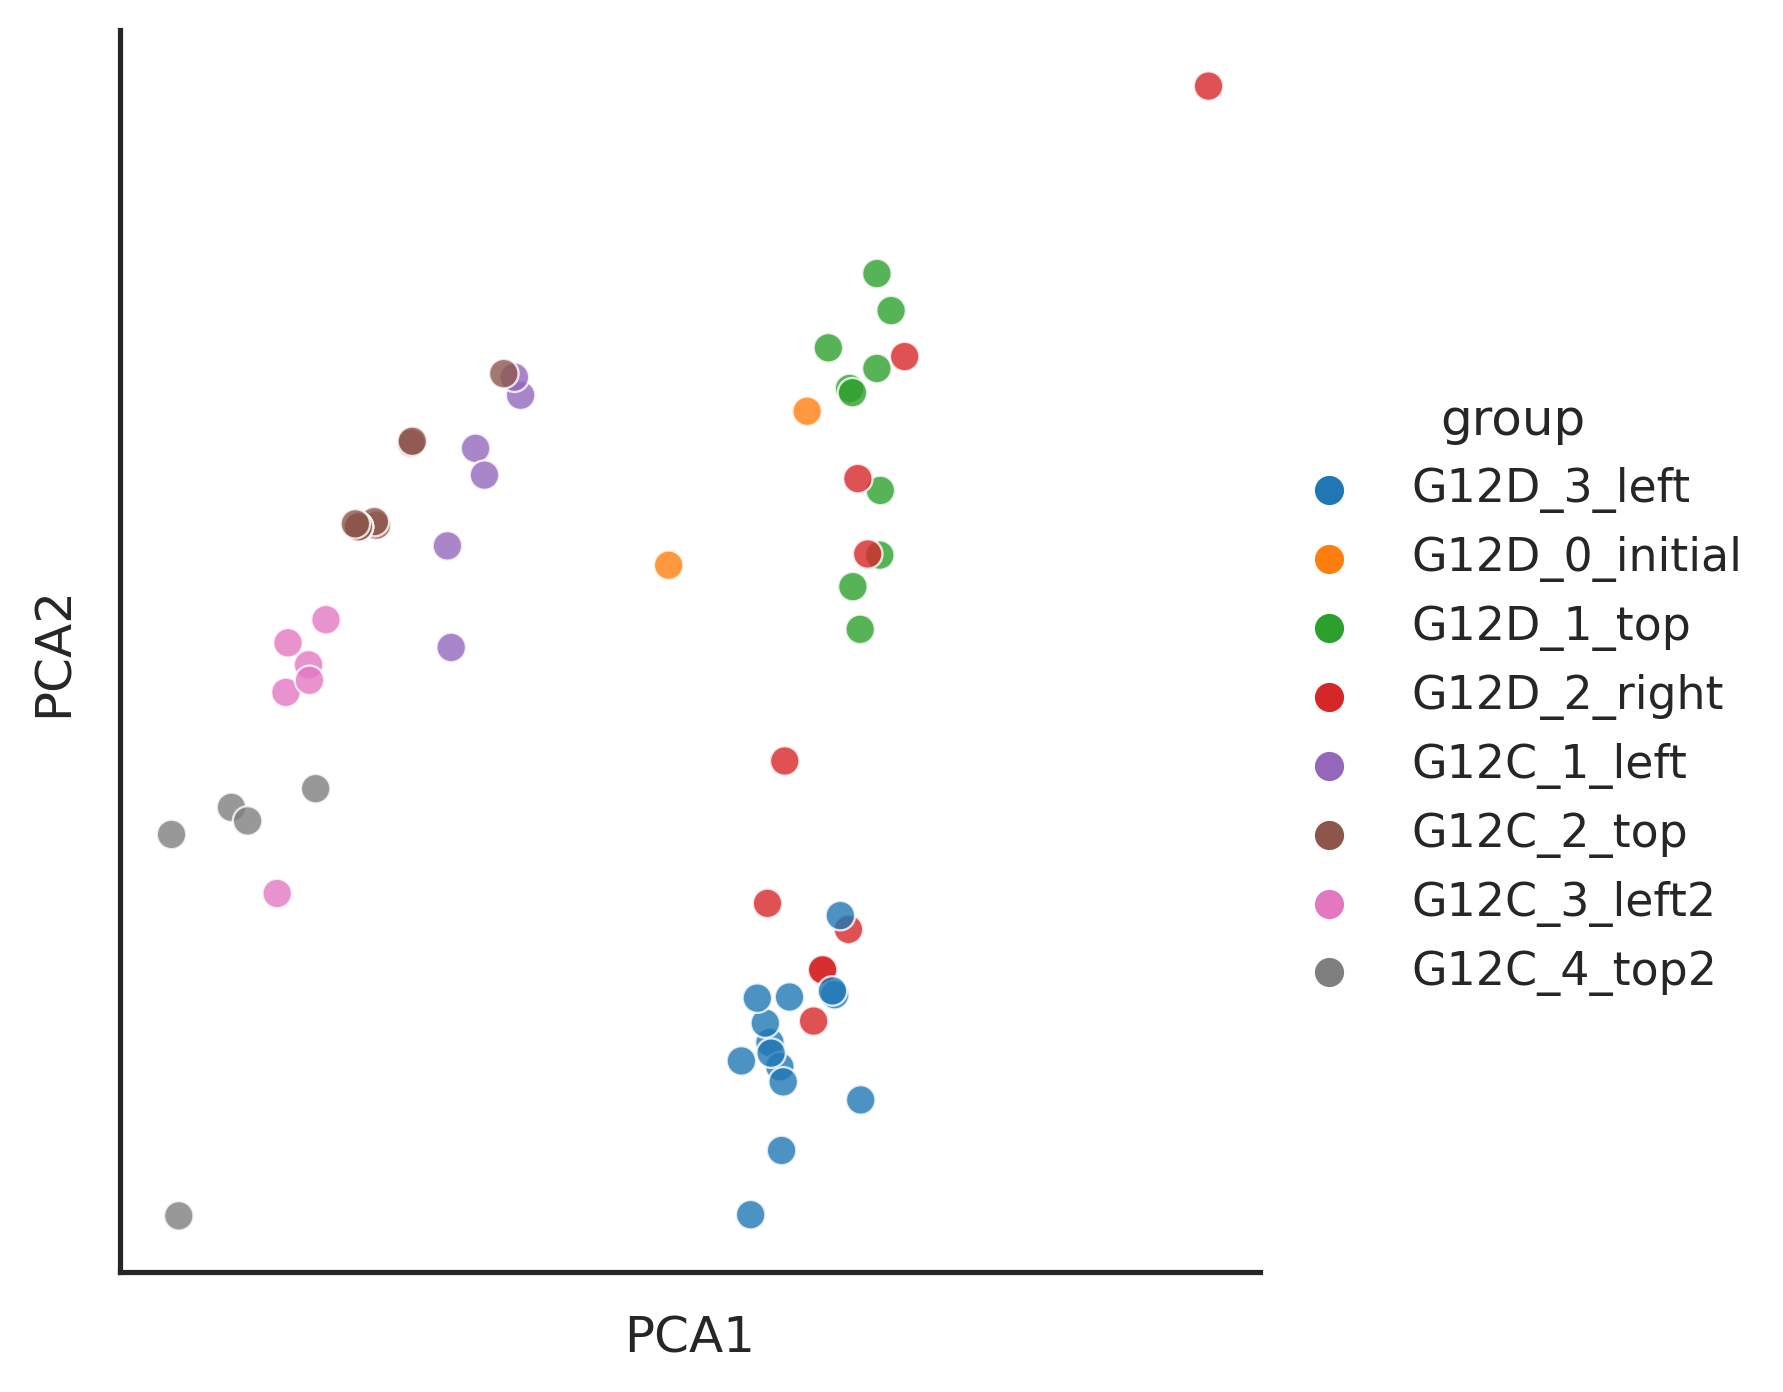

In [ ]:
direct_pca_plot(prop_std,df.group,legend=True)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()